In [78]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [79]:
#data Read
df = pd.read_csv('data.csv')
df_org = pd.read_csv('Data_CHF_Zhao_2020_ATE.csv')

In [80]:
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [81]:
df_org.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [82]:
#Removing id from both datasets.
df.drop('id',1, inplace=True)
df_org.drop('id',1,inplace=True)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_71602/3770839809.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('id',1, inplace=True)
/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_71602/3770839809.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_org.drop('id',1,inplace=True)


In [83]:
df.head()

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [84]:
df

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...
31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


In [85]:
df.isnull().sum()

author                  5024
geometry                5500
pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64

In [86]:
df_org

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0
...,...,...,...,...,...,...,...,...,...
1860,Richenderfer,plate,1.01,1500,-0.0218,15.0,120.0,10,9.4
1861,Richenderfer,plate,1.01,1500,-0.0434,15.0,120.0,10,10.4
1862,Richenderfer,plate,1.01,2000,-0.0109,15.0,120.0,10,10.8
1863,Richenderfer,plate,1.01,2000,-0.0218,15.0,120.0,10,10.9


In [87]:
df_test = df.dropna()

In [88]:
df_test

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
9,Peskov,tube,12.00,1617.0,0.1228,10.0,10.0,520.0,2.2
15,Thompson,tube,12.07,3255.0,0.0406,1.9,1.9,152.0,2.9
17,Thompson,tube,10.41,2563.0,0.1092,4.6,4.6,229.0,6.8
30,Janssen,annulus,9.68,5615.0,0.0196,12.7,38.1,914.0,2.9
...,...,...,...,...,...,...,...,...,...
31623,Janssen,annulus,8.27,2731.0,0.1601,5.0,13.3,2134.0,1.3
31624,Weatherhead,tube,13.79,963.0,0.1693,7.7,7.7,457.0,1.5
31626,Thompson,tube,15.51,2984.0,0.0253,1.9,1.9,696.0,2.5
31627,Thompson,tube,0.64,3282.0,-0.1224,3.0,3.0,100.0,7.1


In [89]:
df_final = pd.concat([df, df_org])

In [90]:
df_final.reset_index(drop=True, inplace=True)

In [91]:
df_final

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...
33504,Richenderfer,plate,1.01,1500.0,-0.0218,15.0,120.0,10.0,9.4
33505,Richenderfer,plate,1.01,1500.0,-0.0434,15.0,120.0,10.0,10.4
33506,Richenderfer,plate,1.01,2000.0,-0.0109,15.0,120.0,10.0,10.8
33507,Richenderfer,plate,1.01,2000.0,-0.0218,15.0,120.0,10.0,10.9


In [92]:
df = df_final

In [93]:
df.columns

Index(['author', 'geometry', 'pressure [MPa]', 'mass_flux [kg/m2-s]',
       'x_e_out [-]', 'D_e [mm]', 'D_h [mm]', 'length [mm]',
       'chf_exp [MW/m2]'],
      dtype='object')

In [94]:
cat_col = ['author', 'geometry']
num_col = ['pressure [MPa]', 'mass_flux [kg/m2-s]', 'D_e [mm]', 'D_h [mm]', 'length [mm]','chf_exp [MW/m2]']

In [95]:
df[cat_col] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_col])
df[num_col]  = SimpleImputer(strategy='median').fit_transform(df[num_col])
df.head()

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Thompson,tube,7.00,3770.0,0.1754,7.8,10.8,432.0,3.6
1,Thompson,tube,11.03,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,tube,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,Thompson,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [96]:
df.isnull().sum()

author                     0
geometry                   0
pressure [MPa]             0
mass_flux [kg/m2-s]        0
x_e_out [-]            10415
D_e [mm]                   0
D_h [mm]                   0
length [mm]                0
chf_exp [MW/m2]            0
dtype: int64

In [97]:
authors = df.groupby('author')['x_e_out [-]'].mean().to_json()
geometry = df.groupby('geometry')['x_e_out [-]'].mean().to_json()

In [98]:
authors, geometry

('{"Beus":0.0590216495,"Inasaka":-0.0858685714,"Janssen":0.0518519737,"Kossolapov":-0.0561817073,"Mortimore":0.0506020134,"Peskov":-0.0338687668,"Richenderfer":-0.0306356265,"Thompson":-0.0087537113,"Weatherhead":-0.01624295,"Williams":0.0750169903}',
 '{"annulus":0.0554169006,"plate":-0.0333552966,"tube":-0.0077459565}')

In [99]:
df['author'] = df['author'].replace({"Beus":0.0423762641,"Inasaka":-0.0550415094,"Janssen":0.0382268179,"Kossolapov":-0.0394247788,"Mortimore":0.0364259259,"Peskov":-0.0213683924,"Richenderfer":-0.0199932874,"Thompson":-0.0044787622,"Weatherhead":-0.0098770209,"Williams":0.0509003185})

In [100]:
df['geometry'] = df['geometry'].replace({"annulus":0.0404497163,"plate":-0.0222118619,"tube":-0.0037784475})

In [101]:
df

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,-0.004479,-0.003778,7.00,3770.0,0.1754,7.8,10.8,432.0,3.6
1,-0.004479,-0.003778,11.03,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,-0.004479,-0.003778,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,0.042376,0.040450,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,-0.004479,-0.003778,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...
33504,-0.019993,-0.022212,1.01,1500.0,-0.0218,15.0,120.0,10.0,9.4
33505,-0.019993,-0.022212,1.01,1500.0,-0.0434,15.0,120.0,10.0,10.4
33506,-0.019993,-0.022212,1.01,2000.0,-0.0109,15.0,120.0,10.0,10.8
33507,-0.019993,-0.022212,1.01,2000.0,-0.0218,15.0,120.0,10.0,10.9


In [102]:
df.columns

Index(['author', 'geometry', 'pressure [MPa]', 'mass_flux [kg/m2-s]',
       'x_e_out [-]', 'D_e [mm]', 'D_h [mm]', 'length [mm]',
       'chf_exp [MW/m2]'],
      dtype='object')

In [103]:
norm_col =['pressure [MPa]', 'mass_flux [kg/m2-s]', 'D_e [mm]', 'D_h [mm]', 'length [mm]',
       'chf_exp [MW/m2]']
df[norm_col] = StandardScaler().fit_transform(df[norm_col].values)

In [104]:
df.columns = ['author', 'geometry', 'pressure', 'mass_flux',
       'x_e_out', 'D_e', 'D_h', 'length',
       'chf_exp']

In [105]:
df

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
0,-0.004479,-0.003778,-0.905845,0.463816,0.1754,-0.152548,-0.159119,-0.591831,-0.100901
1,-0.004479,-0.003778,0.092281,1.851205,-0.0416,0.364705,-0.186045,-0.069179,1.209542
2,-0.004479,-0.003778,0.775860,-0.593010,0.0335,-0.173238,-0.326062,-0.552236,-0.655319
3,0.042376,0.040450,0.775860,0.408418,-0.0279,-0.607731,0.077834,2.103785,-0.403311
4,-0.004479,-0.003778,0.775860,-1.413634,NaN,0.530227,-0.142963,-0.552236,-0.504114
...,...,...,...,...,...,...,...,...,...
33504,-0.019993,-0.022212,-2.389410,-0.918094,-0.0218,1.337142,5.721610,-1.260191,2.822395
33505,-0.019993,-0.022212,-2.389410,-0.918094,-0.0434,1.337142,5.721610,-1.260191,3.326411
33506,-0.019993,-0.022212,-2.389410,-0.613709,-0.0109,1.337142,5.721610,-1.260191,3.528018
33507,-0.019993,-0.022212,-2.389410,-0.613709,-0.0218,1.337142,5.721610,-1.260191,3.578420


<AxesSubplot: >

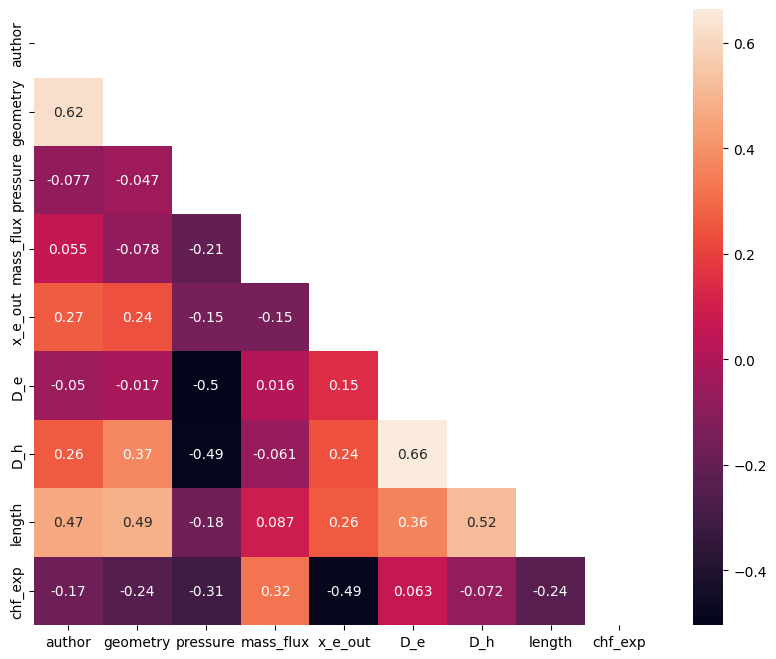

In [110]:
plt.figure(figsize=(10,8))
corr = df.corr(method = 'spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask = mask, annot=True)

In [118]:
df_trn = df[df['x_e_out'].isna() == False]
df_tst = df[df['x_e_out'].isna() == True]

In [120]:
df_trn

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
0,-0.004479,-0.003778,-0.905845,0.463816,0.1754,-0.152548,-0.159119,-0.591831,-0.100901
1,-0.004479,-0.003778,0.092281,1.851205,-0.0416,0.364705,-0.186045,-0.069179,1.209542
2,-0.004479,-0.003778,0.775860,-0.593010,0.0335,-0.173238,-0.326062,-0.552236,-0.655319
3,0.042376,0.040450,0.775860,0.408418,-0.0279,-0.607731,0.077834,2.103785,-0.403311
5,-0.004479,-0.003778,1.630334,0.389546,-0.0711,-0.152548,-0.638409,-0.173709,-0.100901
...,...,...,...,...,...,...,...,...,...
33504,-0.019993,-0.022212,-2.389410,-0.918094,-0.0218,1.337142,5.721610,-1.260191,2.822395
33505,-0.019993,-0.022212,-2.389410,-0.918094,-0.0434,1.337142,5.721610,-1.260191,3.326411
33506,-0.019993,-0.022212,-2.389410,-0.613709,-0.0109,1.337142,5.721610,-1.260191,3.528018
33507,-0.019993,-0.022212,-2.389410,-0.613709,-0.0218,1.337142,5.721610,-1.260191,3.578420


In [121]:
df_tst

,author,geometry,pressure,mass_flux,x_e_out,D_e,D_h,length,chf_exp
4,-0.004479,-0.003778,0.775860,-1.413634,NaN,0.530227,-0.142963,-0.552236,-0.504114
7,-0.021368,-0.003778,1.818566,-1.374672,NaN,0.302635,-0.202201,1.337229,-0.806524
10,-0.004479,-0.003778,0.092281,-0.169914,NaN,-1.373266,-0.638409,-1.035293,-0.302508
12,-0.004479,-0.003778,-0.933089,2.734532,NaN,-0.152548,-0.051413,1.780692,0.503919
23,0.042376,0.040450,1.201859,-1.006366,NaN,-0.607731,0.077834,2.103785,-0.856926
...,...,...,...,...,...,...,...,...,...
31633,-0.004479,-0.003778,0.092281,-0.169914,NaN,0.612987,-0.121422,-0.309915,-0.907328
31634,-0.019993,-0.022212,-2.389410,-0.613709,NaN,1.337142,5.721610,-1.260191,1.209542
31637,-0.009877,-0.003778,0.775860,-1.412416,NaN,-0.152548,-0.142963,-0.552236,-0.756123
31640,-0.004479,-0.003778,0.775860,-0.169914,NaN,-0.793942,-0.487621,-0.309915,0.050304


In [122]:
df_tst.drop('x_e_out',1, inplace=True)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_71602/3746922532.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tst.drop('x_e_out',1, inplace=True)
/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_71602/3746922532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tst.drop('x_e_out',1, inplace=True)


In [123]:
df_tst

,author,geometry,pressure,mass_flux,D_e,D_h,length,chf_exp
4,-0.004479,-0.003778,0.775860,-1.413634,0.530227,-0.142963,-0.552236,-0.504114
7,-0.021368,-0.003778,1.818566,-1.374672,0.302635,-0.202201,1.337229,-0.806524
10,-0.004479,-0.003778,0.092281,-0.169914,-1.373266,-0.638409,-1.035293,-0.302508
12,-0.004479,-0.003778,-0.933089,2.734532,-0.152548,-0.051413,1.780692,0.503919
23,0.042376,0.040450,1.201859,-1.006366,-0.607731,0.077834,2.103785,-0.856926
...,...,...,...,...,...,...,...,...
31633,-0.004479,-0.003778,0.092281,-0.169914,0.612987,-0.121422,-0.309915,-0.907328
31634,-0.019993,-0.022212,-2.389410,-0.613709,1.337142,5.721610,-1.260191,1.209542
31637,-0.009877,-0.003778,0.775860,-1.412416,-0.152548,-0.142963,-0.552236,-0.756123
31640,-0.004479,-0.003778,0.775860,-0.169914,-0.793942,-0.487621,-0.309915,0.050304


In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

X = df_trn.drop('x_e_out', 1)
y= df_trn['x_e_out']

rf.fit(X, y)
gb.fit(X,y)

importances_rf = rf.feature_importances_
importances_gb = gb.feature_importances_

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_71602/3572740243.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_trn.drop('x_e_out', 1)


In [128]:
feature_importances_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})

# Sort the DataFrame by importance in descending order
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_rf)

     Feature  Importance
7    chf_exp    0.351668
3  mass_flux    0.209585
2   pressure    0.169766
6     length    0.088168
4        D_e    0.077239
5        D_h    0.076591
0     author    0.022368
1   geometry    0.004616


In [129]:
feature_importances_gb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_gb})

# Sort the DataFrame by importance in descending order
feature_importances_gb = feature_importances_gb.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_gb)

     Feature  Importance
7    chf_exp    0.438681
2   pressure    0.257608
6     length    0.082493
5        D_h    0.081290
4        D_e    0.065999
3  mass_flux    0.043756
0     author    0.030173
1   geometry    0.000000


### Though some variables as so less importance, but let's first build a model with all features.

In [130]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(loss='absolute_error'),
    "                               XGBoost": XGBRegressor(),
#     "                              LightGBM": LGBMRegressor(),
    "                              CatBoost": CatBoostRegressor(verbose=0)
}

for name, model in models.items():
    print(name, cross_val_score(model,X, y, scoring='neg_mean_squared_error', cv=7, n_jobs=-1).mean())

                     Linear Regression -0.007570642846426267
 Linear Regression (L2 Regularization) -0.007573890925981906
 Linear Regression (L1 Regularization) -0.010499104091963874
                   K-Nearest Neighbors -0.00676709531101567


/Users/bibekchalise/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bibekchalise/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bibekchalise/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bibekchalise/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bibekchalise/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bibekchalise/Library/Python/

Support Vector Machine (Linear Kernel) -0.007721218987147055
   Support Vector Machine (RBF Kernel) -0.0064022264982354525
                         Decision Tree -0.010521038324641156
                         Random Forest -0.006251031435800027
                     Gradient Boosting -0.006139398075096838
                               XGBoost -0.005617514501536963
                              CatBoost -0.005445596265011037


# Looks like Decision Tree is the best.

In [131]:
decision_tree = DecisionTreeRegressor()
bagging = BaggingRegressor(base_estimator=decision_tree, n_estimators=200, n_jobs=-1, max_samples=0.8)
bagging.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=200, n_jobs=-1)

In [132]:
y_prediction = bagging.predict(df_tst)

In [142]:
df_sub = pd.read_csv('sample_submission.csv')

In [143]:
df_sub

,id,x_e_out [-]
0,4,0.0
1,7,0.0
2,10,0.0
3,12,0.0
4,23,0.0
...,...,...
10410,31633,0.0
10411,31634,0.0
10412,31637,0.0
10413,31640,0.0


In [144]:
df_sub['x_e_out [-]'] = y_prediction
df_sub

,id,x_e_out [-]
0,4,0.009242
1,7,-0.107045
2,10,-0.032937
3,12,0.000228
4,23,0.022212
...,...,...
10410,31633,0.081978
10411,31634,-0.051943
10412,31637,0.050433
10413,31640,-0.084535


In [145]:
df_sub

,id,x_e_out [-]
0,4,0.009242
1,7,-0.107045
2,10,-0.032937
3,12,0.000228
4,23,0.022212
...,...,...
10410,31633,0.081978
10411,31634,-0.051943
10412,31637,0.050433
10413,31640,-0.084535


In [146]:
df_sub.to_csv('submission.csv',index=False)